<a href="https://colab.research.google.com/github/TomasManuelObregon/Python/blob/main/Pendulo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Periodo de un Pendulo




###Importo lo necesario y defino algunas cosas

Importo lo que voy a usar.
Luego elijo 'alguna' lista de datos aleatorios (en este caso la 0) para que random.shuffle siempre mezcle los datos de la misma manera.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.optimize import curve_fit

datos = np.loadtxt('Mediciones.csv')
np.random.seed(0)
np.random.shuffle(datos)

Divido en subgrupos.

In [ ]:
d = np.split(datos, 10)

Defino la funcion 'todo' para calcular los valores medios y la desviación estandar de cada grupo y luego graficar los datos en un histograma.

In [ ]:
def todo(i, b, k):
  # El parametro b define el ancho de los bins 
  # Defino el Valor medio(x) y la Desviacion Media(s)
  x = np.round(np.mean(i), decimals=2)
  s = np.round(np.std(i), decimals=2)   
  print('Valor Medio:', x,'- Desviacion Estandar:', s)

  # Dibujo el Histograma de cada Grupo
  sns.histplot(i,
               binwidth= b, 
               binrange=(1.50,2.10),
               color='lightblue', edgecolor='black'
              )
  
  plt.title(f'Grupo {k}', fontsize=25)
  plt.grid(axis='y', linestyle='-.', color='black')
  plt.xlabel('Tiempo [s]', fontsize=15)
  plt.ylabel('Cantidad de Repeticiones', fontsize=15)
  plt.xlim(1.45,2.15)
  plt.show()
  return

###Grafico histogramas individualmente.

Grafico todos los subgrupos.

Valor Medio: 1.8 - Desviacion Estandar: 0.1


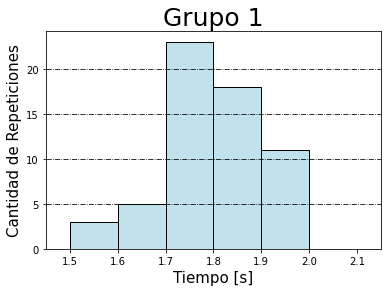

Valor Medio: 1.8 - Desviacion Estandar: 0.1


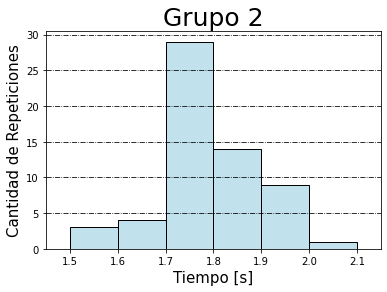

Valor Medio: 1.84 - Desviacion Estandar: 0.1


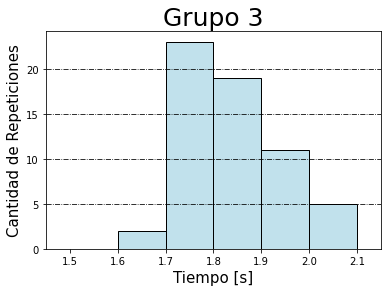

Valor Medio: 1.82 - Desviacion Estandar: 0.1


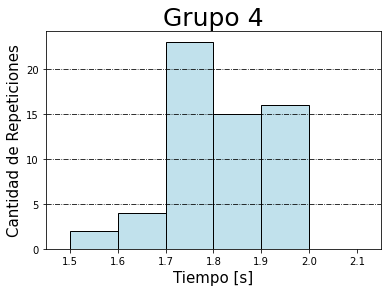

Valor Medio: 1.81 - Desviacion Estandar: 0.1


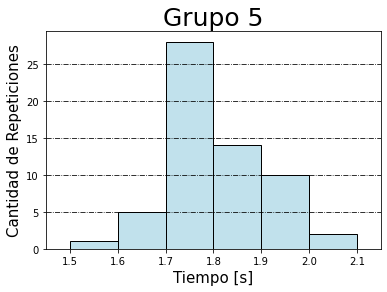

Valor Medio: 1.79 - Desviacion Estandar: 0.1


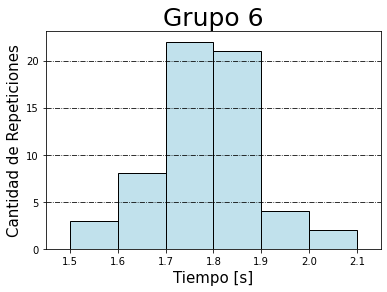

Valor Medio: 1.8 - Desviacion Estandar: 0.11


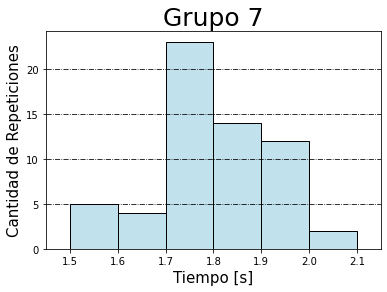

Valor Medio: 1.8 - Desviacion Estandar: 0.11


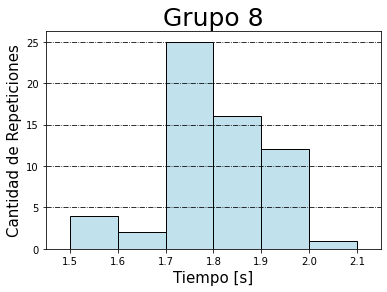

Valor Medio: 1.81 - Desviacion Estandar: 0.11


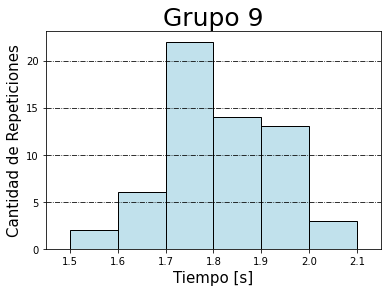

Valor Medio: 1.79 - Desviacion Estandar: 0.11


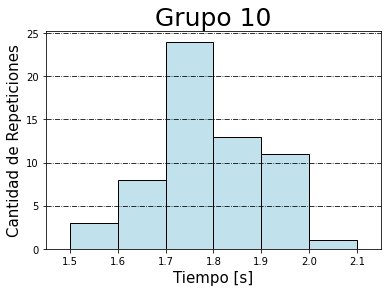

In [ ]:
for j in range(0,10):
  todo(d[j],0.10,j+1)

Gafico todos los datos.

Valor Medio: 1.8 - Desviacion Estandar: 0.1


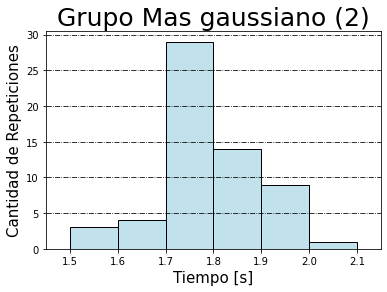

Valor Medio: 1.8 - Desviacion Estandar: 0.1


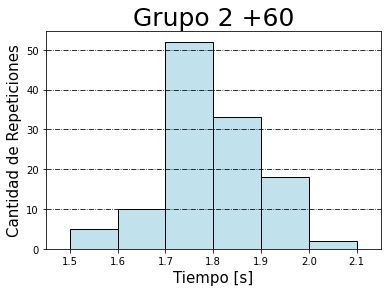

Valor Medio: 1.81 - Desviacion Estandar: 0.11


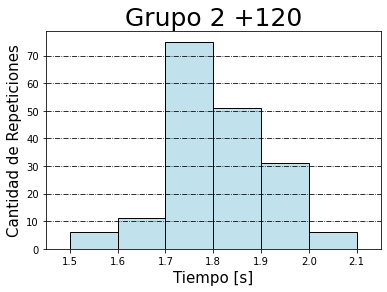

Valor Medio: 1.81 - Desviacion Estandar: 0.1


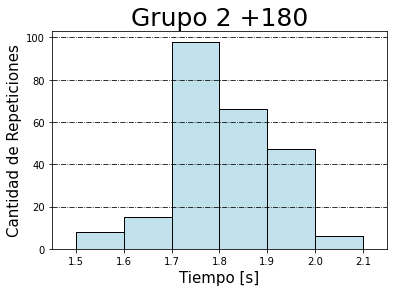

Valor Medio: 1.81 - Desviacion Estandar: 0.1


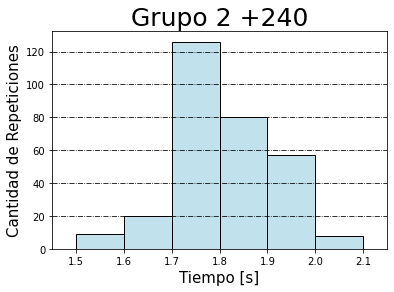

Valor Medio: 1.81 - Desviacion Estandar: 0.1


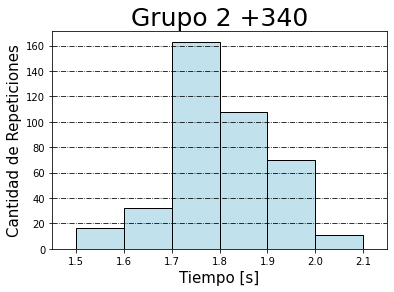

Valor Medio: 1.81 - Desviacion Estandar: 0.1


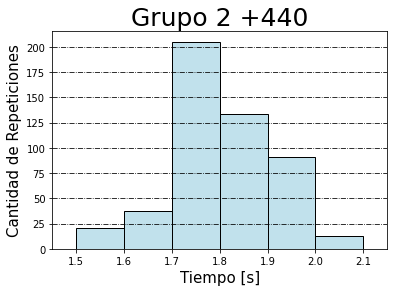

Valor Medio: 1.81 - Desviacion Estandar: 0.11


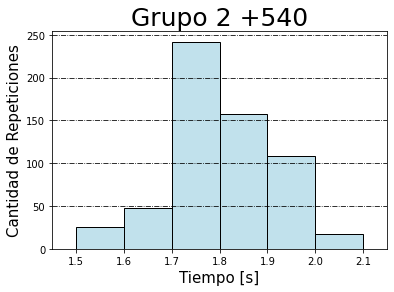

In [ ]:
# d[1] es el subgrupo de datos que mas se parece a una distribucion gaussiana
todo(d[1],0.10,'Mas gaussiano (2)') 

# Agrego 30 datos para cada lado de d[1] para pasar de 60 datos a 120
todo(datos[30:150],0.10,'2 +60')

# Agrego 30 datos para cada lado del nuevo arrange para pasar de 120 datos a 180
todo(datos[0:180],0.10,'2 +120')

# Agrego 60 datos para para pasar de 180 datos a 240
todo(datos[0:240],0.10,'2 +180')

# Agrego 60 datos para para pasar de 240 datos a 300
todo(datos[0:300],0.10,'2 +240')

# Agrego 100 datos para para pasar de 300 datos a 400
todo(datos[0:400],0.10,'2 +340')

# Agrego 100 datos para para pasar de 400 datos a 500
todo(datos[0:500],0.10,'2 +440')

# Agrego 100 datos para para pasar de 500 datos a 600
todo(datos,0.10,'2 +540')

###Graficos Superpuestos

Grafico los histogramas del Grupo 2 y de todos los datos.

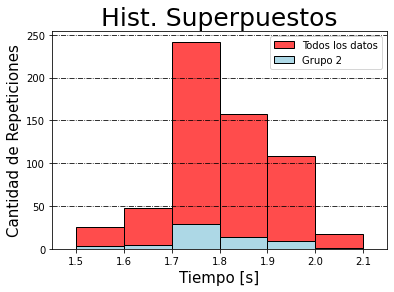

In [ ]:
sns.histplot(datos,
              label = 'Todos los datos',
              binwidth= 0.10, 
              binrange=(1.50,2.10),
              alpha= 0.7,
              color='red', 
              edgecolor='black'
            )
sns.histplot(d[1],
              label = 'Grupo 2',
              binwidth= 0.10, 
              alpha= 1,
              binrange=(1.50,2.10),
              color='lightblue', edgecolor='black'
            )

plt.title(('Hist. Superpuestos'), fontsize=25)
plt.grid(axis='y', linestyle='-.', color='black')
plt.xlabel('Tiempo [s]', fontsize=15)
plt.ylabel('Cantidad de Repeticiones', fontsize=15)
plt.xlim(1.45,2.15)
plt.legend()
plt.show()

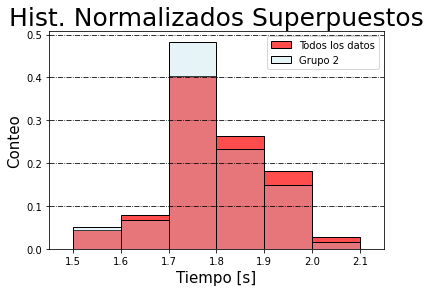

In [ ]:
sns.histplot(datos,
              label = 'Todos los datos',
              stat = 'probability', # Esta linea normaliza el Histograma
              binwidth= 0.10, 
              binrange=(1.50,2.10),
              alpha= 0.7,
              color='red', 
              edgecolor='black'
            )
sns.histplot(d[1],
              label = 'Grupo 2',
              stat = 'probability', # Esta linea normaliza el Histograma
              binwidth= 0.10, 
              alpha= 0.3,
              binrange=(1.50,2.10),
              color='lightblue', edgecolor='black'
            )
plt.title(('Hist. Normalizados Superpuestos'), fontsize=25)
plt.grid(axis='y', linestyle='-.', color='black')
plt.xlabel('Tiempo [s]', fontsize=15)
plt.ylabel('Conteo', fontsize=15)
plt.xlim(1.45,2.15)
plt.legend()
plt.show()

Grafico los histogramas del Grupo 2 y de los promedios normalizados.

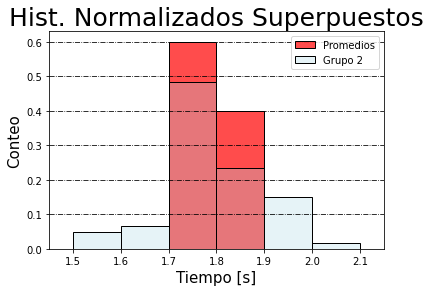

In [ ]:
# Calculo el Promedio de los Promedios
prom_de_proms = [1.80,1.80,1.84,1.82,1.81,1.79,1.80,1.80,1.81,1.79] 

sns.histplot(prom_de_proms,
              label = 'Promedios',
              stat = 'probability', # Esta linea normaliza el Histograma
              binwidth= 0.10, 
              binrange=(1.50,2.10),
              alpha= 0.7,
              color='red', 
              edgecolor='black'
            )
sns.histplot(d[1],
              label = 'Grupo 2',
              stat = 'probability', # Esta linea normaliza el Histograma
              binwidth= 0.10, 
              alpha= 0.3,
              binrange=(1.50,2.10),
              color='lightblue', edgecolor='black'
            )
plt.title(('Hist. Normalizados Superpuestos'), fontsize=25)
plt.grid(axis='y', linestyle='-.', color='black')
plt.xlabel('Tiempo [s]', fontsize=15)
plt.ylabel('Conteo', fontsize=15)
plt.xlim(1.45,2.15)
plt.legend()
plt.show()

Comparo las Gaussianas generadas por la desviacion estandar y el valor promedio del Grupo 2 y de todos los datos

Promedio de los Promedios= Valor Medio:1.81. Desviacion: 0.01
Grupo 2= Valor Medio:1.8. Desviacion: 0.1


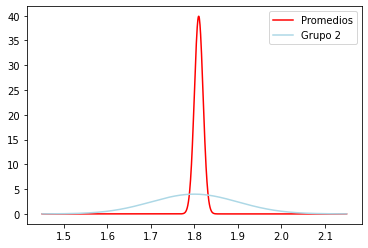

In [ ]:
# Defino variables de Valores medios y desviaciones estandar
x_p = np.round(np.mean(prom_de_proms), decimals=2)
s_p = np.round(np.std(prom_de_proms), decimals=2)

x_2 = np.round(np.mean(d[1]), decimals=2)
s_2 = np.round(np.std(d[1]), decimals=2)

# Defino una funcion para graficar las gaussianas asociadas a cada Grupo (sin normalizar)
def gauss(i,j,k,l):

  # Creo un array con mil datos entre 1.45 y 2.15
  X = np.linspace(1.45,2.15,1000)

  """
  Para llamar la funcion debo dar las siguientes variavles:
  i = valor medio
  j = Desviacion estandar
  k = color de cada funcion
  l = Etiqueta de cada funcion
  """
  Y = stats.norm.pdf(X, loc= i , scale= j)
  plt.plot(X,Y , color = k, label= l)
  plt.legend()
  
print(f'Promedio de los Promedios= Valor Medio:{x_p}. Desviacion: {s_p}')
print(f'Grupo 2= Valor Medio:{x_2}. Desviacion: {s_2}')

gauss(x_p,s_p,'red','Promedios')
gauss(x_2,s_2,'lightblue','Grupo 2')


###Grafico la curva ajustada al histograma de todos los datos

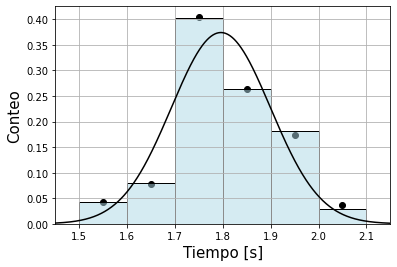

In [ ]:
# Histograma
sns.histplot(datos,
              stat = 'probability',
              binwidth= 0.10, 
              binrange=(1.50,2.10),
              alpha= 0.5,
              color='lightblue' 
            )

# Puntos de la Tablita
X = [1.55,1.65,1.75,1.85,1.95,2.05]
Y = [0.043, 0.078, 0.405, 0.263, 0.173, 0.037]

plt.scatter(X,Y, color= 'black')


# Curva
def f_g(i,u,d,a):
  Y = (a)/(d*np.sqrt(2*np.pi))*np.exp(-(i-u)**2/(2*(d**2)))
  return Y

popt,pcov = curve_fit(f_g,X,Y,p0=[1.8,0.11,0.09])
x_ = popt[0]
s_ = popt[1]
a_ = popt[2]

eje_x = np.linspace(1.45,2.15,1000)
eje_y = f_g(eje_x,x_,s_,a_)

plt.plot(eje_x ,eje_y, color= 'black')

plt.xlabel('Tiempo [s]', fontsize=15)
plt.ylabel('Conteo', fontsize=15)
plt.xlim(1.45,2.15)
plt.grid()
plt.show()